In [6]:
import os
import sys
current_dir = os.getcwd()
kit_dir = os.path.abspath(os.path.join(current_dir, ".."))
repo_dir = os.path.abspath(os.path.join(kit_dir, ".."))

sys.path.append(kit_dir)
sys.path.append(repo_dir)

from dotenv import load_dotenv
load_dotenv(os.path.join(repo_dir, ".env"))

True

In [7]:
from io import BytesIO
from PIL import Image
import requests
import ipyplot

## Download images

In [9]:
original_api = "https://pixabay.com/api/?key="
pixabay_api_key = os.getenv("PIXABAY_API_KEY")

In [10]:
keywords=["animals","nature","appliances","art","food","nature","places","professions","sports"]

In [11]:
all_images =[]
for pixabay_search_keyword in keywords:
        output_directory = os.path.join(kit_dir,f"data/images/{pixabay_search_keyword}")
        if not os.path.exists(output_directory):
                os.makedirs(output_directory)
        save=True
        no_to_retrieve = 20
        pixabay_api = original_api+pixabay_api_key+"&q="+pixabay_search_keyword.lower()+"&image_type=photo&safesearch=true&per_page="+str(no_to_retrieve)
        response = requests.get(pixabay_api)
        output = response.json()

        for idx, each in enumerate(output["hits"]):
                imageurl = each["webformatURL"]
                response = requests.get(imageurl)
                image = Image.open(BytesIO(response.content)).convert("RGB")
                all_images.append(image)
                if save:
                        image_filename = f"{pixabay_search_keyword}_{idx}.png"
                        image_path = os.path.join(output_directory, image_filename)
                        image.save(image_path)

print ("Total no of images retrived: ",len(all_images))

Total no of images retrived:  45


/Users/jorgep/Documents/ask_public_own/isenv/lib/python3.10/site-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



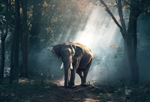
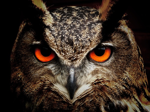
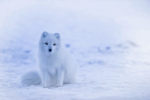
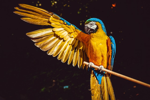
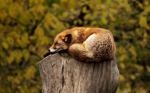
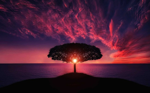
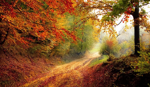
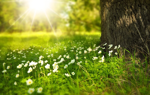
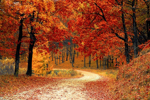
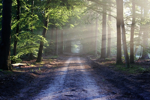
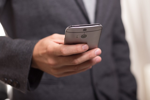
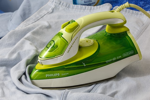
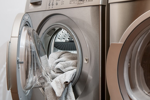
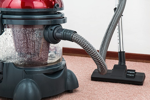
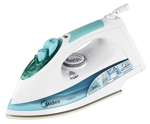
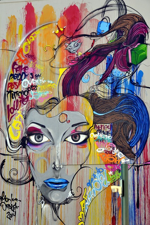
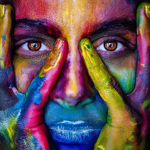
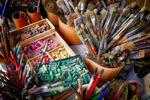
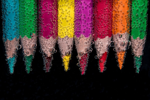
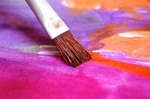
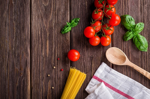
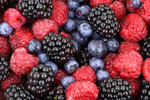
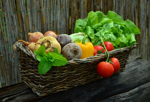
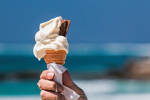
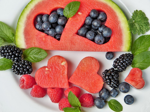
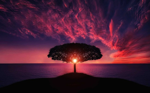
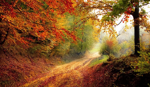
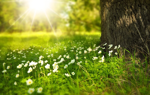
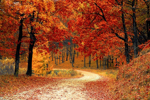
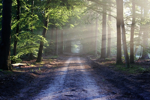
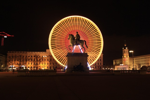
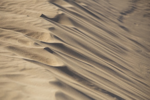
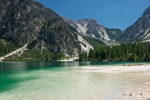
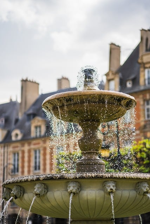
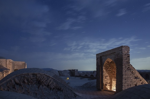
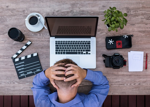
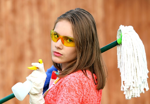
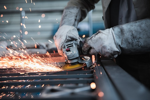
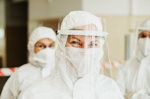
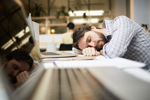
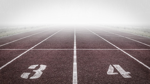
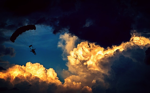
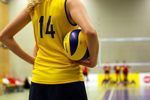
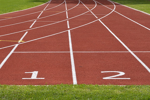
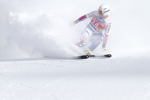


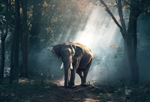
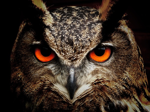
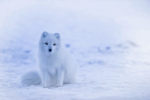
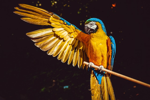
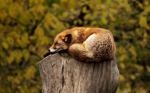
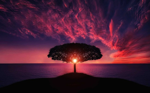
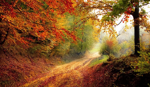
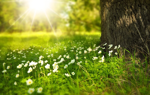
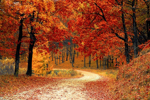
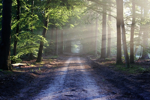
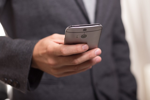
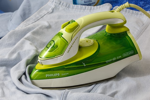
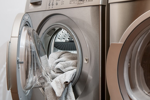
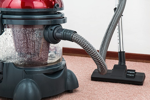
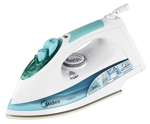
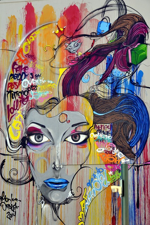
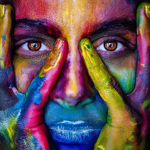
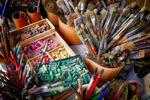
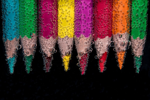
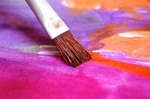
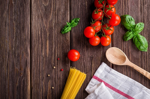
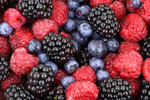
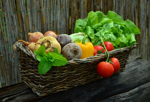
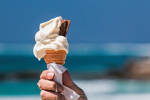
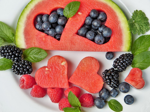
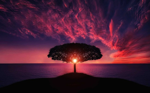
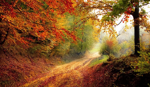
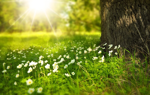
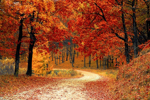
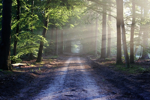
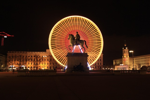
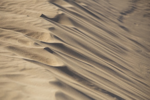
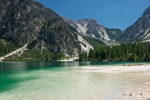
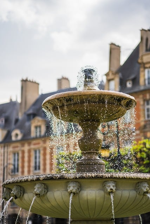
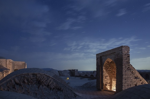
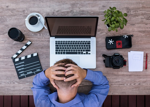
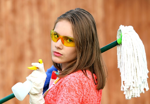
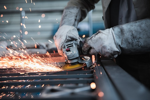
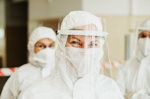
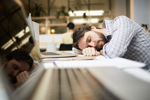
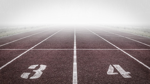
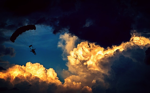
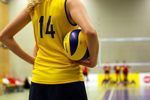
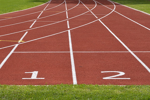
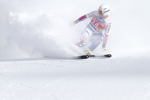

In [12]:
ipyplot.plot_images(all_images,max_images=200,img_width=150)